In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from wordcloud import WordCloud

In [61]:
df = pd.read_csv("googleplaystore.csv")

In [62]:
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9366 non-null   float64
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [64]:
df.shape

(10840, 13)

In [65]:
#checking for missing values
df.isnull().sum()

Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [66]:
# finding unique values
unique_categories = df['Category'].unique()
print(unique_categories)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [67]:
# cleaning the size column

# Replace non-numeric values and convert kilobytes to megabytes
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].str.replace('M', '').str.replace('k', '').astype(float)
df.loc[df['Size'] < 1, 'Size'] = df.loc[df['Size'] < 1, 'Size'] / 1024  # Converting kilobytes to megabytes for values less than 1 MB

print(df['Size'])

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10835    53.0
10836     3.6
10837     9.5
10838     NaN
10839    19.0
Name: Size, Length: 10840, dtype: float64


In [68]:
# Rename the column
df.rename(columns={'Size': 'Size (Mbyte)'}, inplace=True)


In [69]:
# cleaning the installs column

df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)
print(df['Installs'])

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10835        5000.0
10836         100.0
10837        1000.0
10838        1000.0
10839    10000000.0
Name: Installs, Length: 10840, dtype: float64


<ipython-input-69-e6b12244302e>:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [70]:
#finding unique values in 'category' column

unique_categories = df['Category'].unique()
print(unique_categories)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [71]:
# finding unique values in 'Genres' column

unique_genres = df['Genres'].unique()
print(unique_genres)

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle

In [72]:
unique_genres_count = df['Genres'].value_counts()
print(unique_genres_count)

Tools                                842
Entertainment                        623
Education                            549
Medical                              463
Business                             460
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64


In [73]:
# finding unique values in 'content rating' column

unique_groups = df['Content Rating'].unique()
print(unique_groups)

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


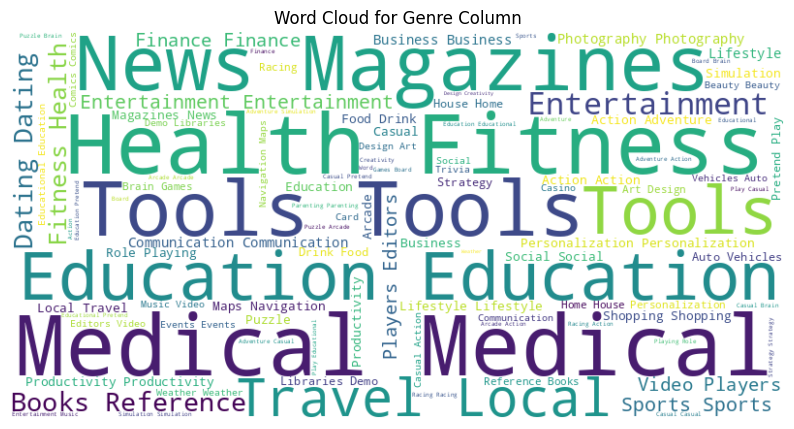

In [74]:
# making wordcloud for genre column

# Concatenate all genres into a single string
genres_text = ' '.join(df['Genres'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Genre Column")
plt.savefig("Word Cloud for Genre Column")
plt.show()

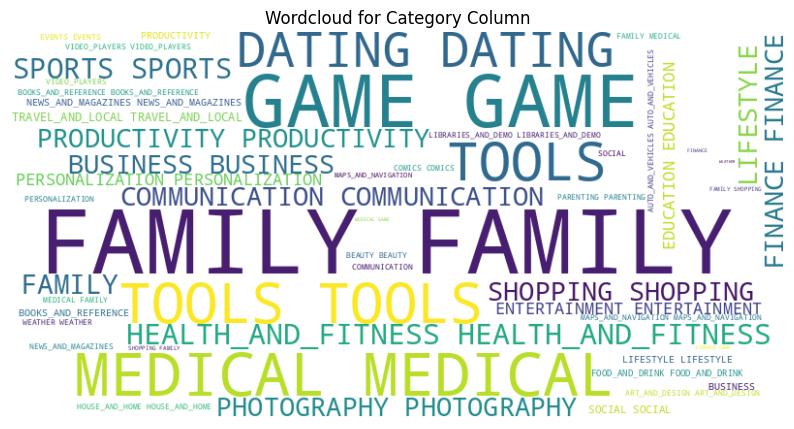

In [75]:
# wordcloud for 'category' column

# Concatenate all categories into a single string
categories_text = ' '.join(df['Category'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(categories_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud for Category Column")
plt.savefig("wordcloud for category column")
plt.show()

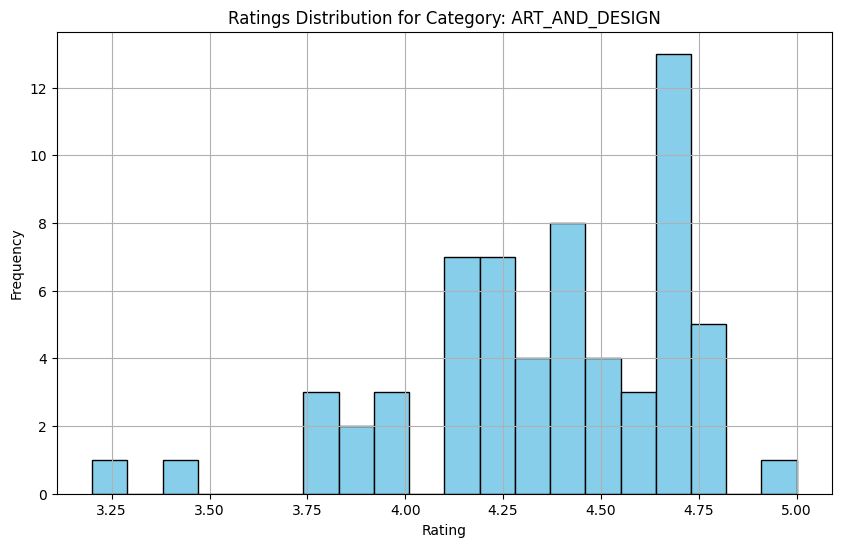

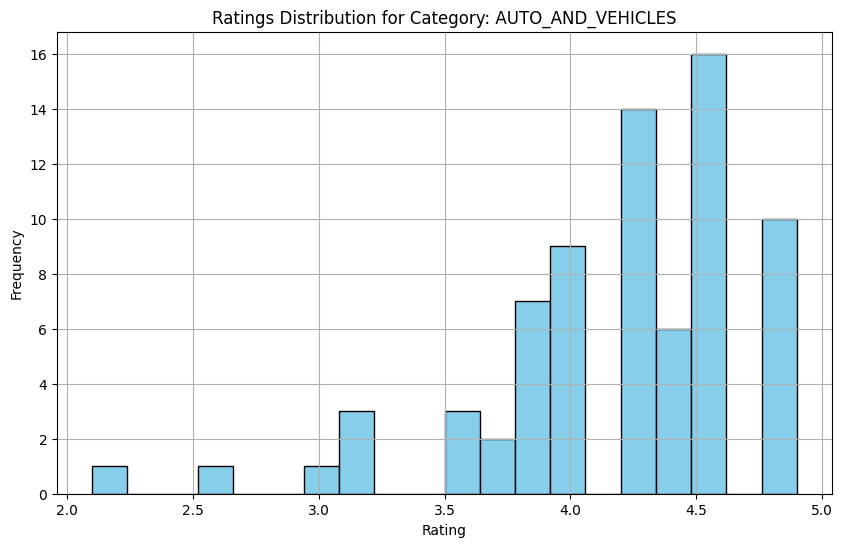

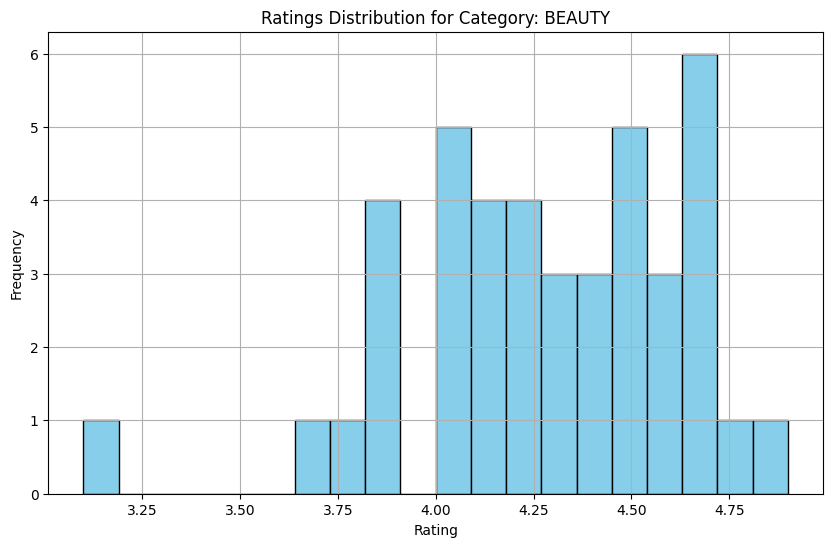

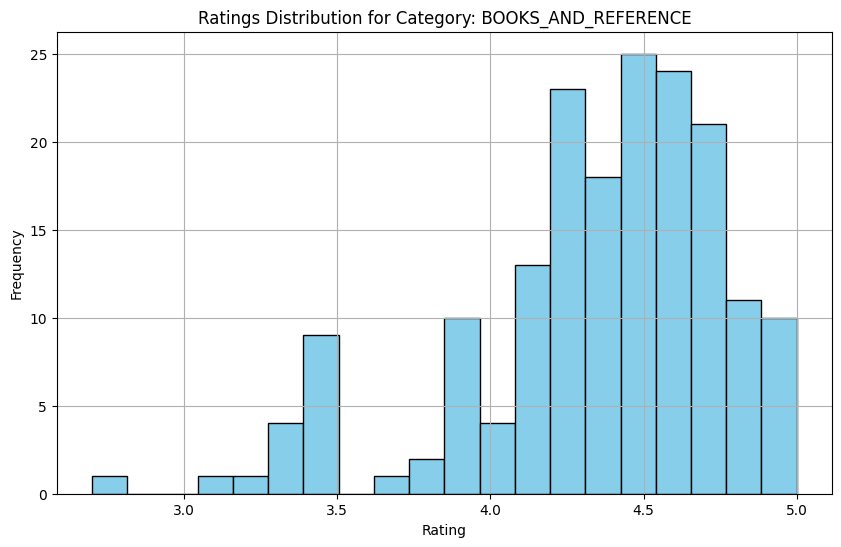

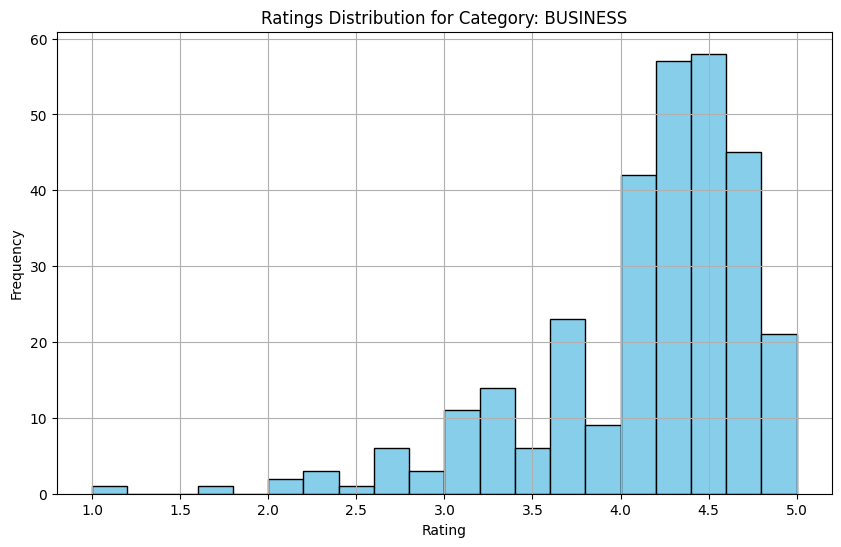

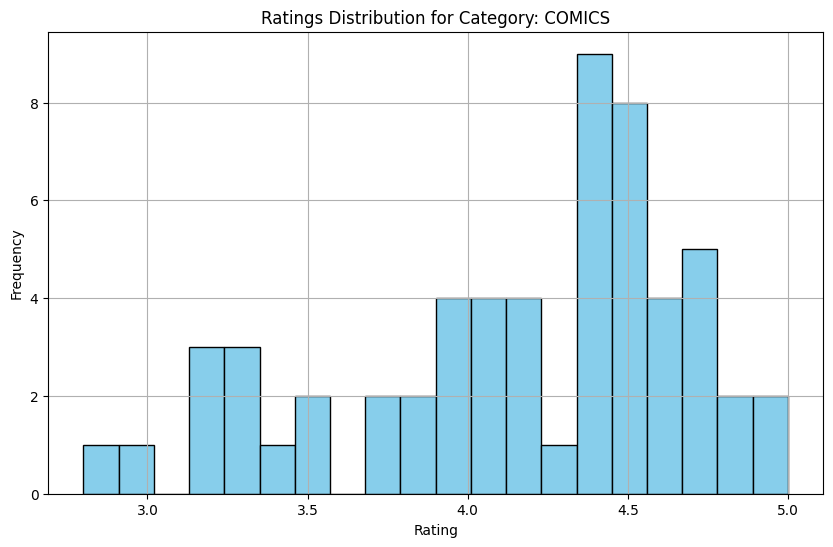

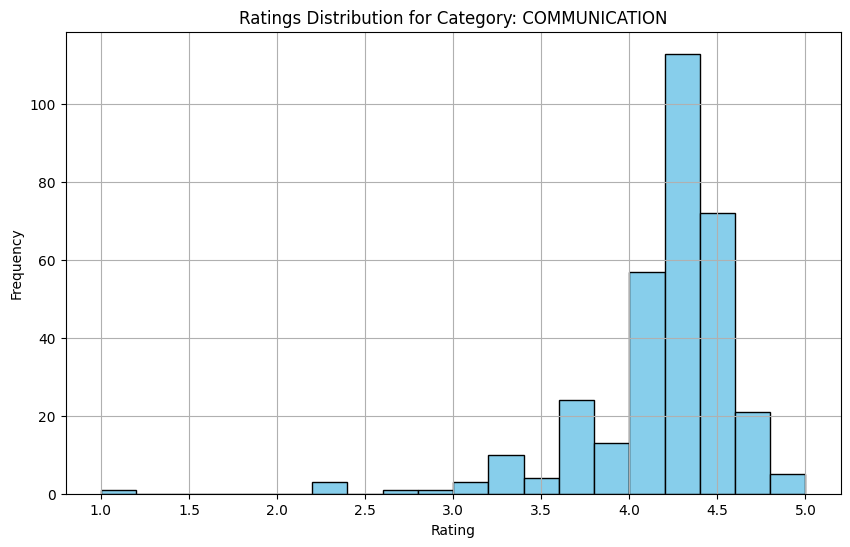

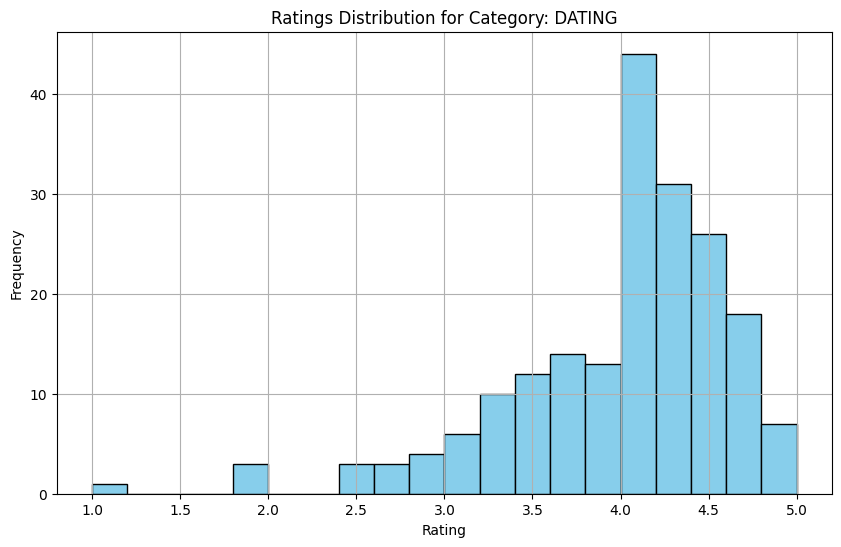

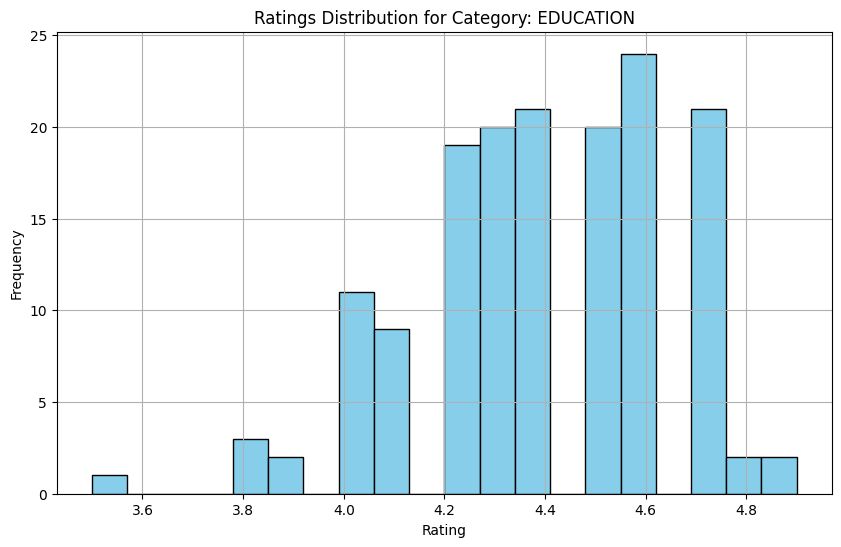

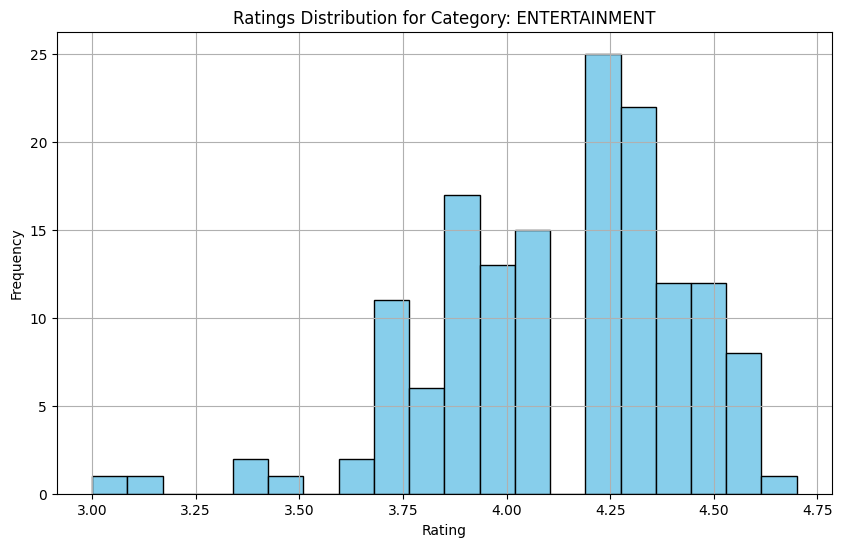

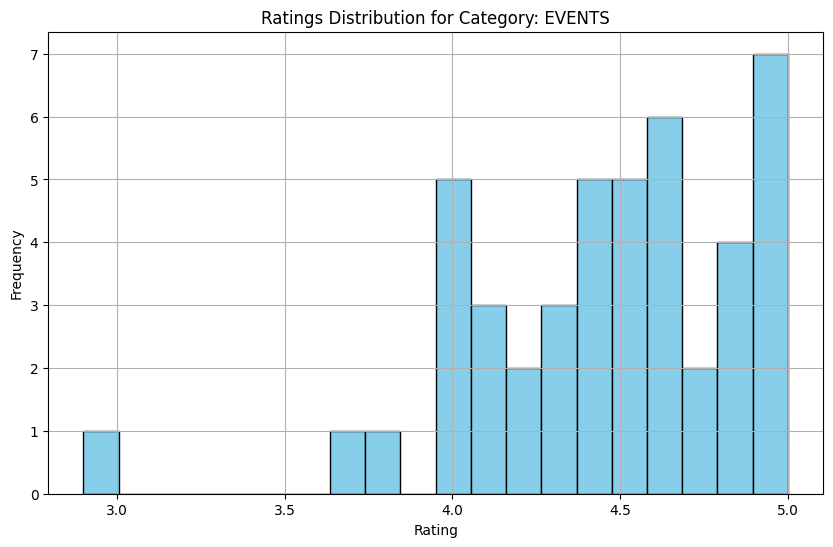

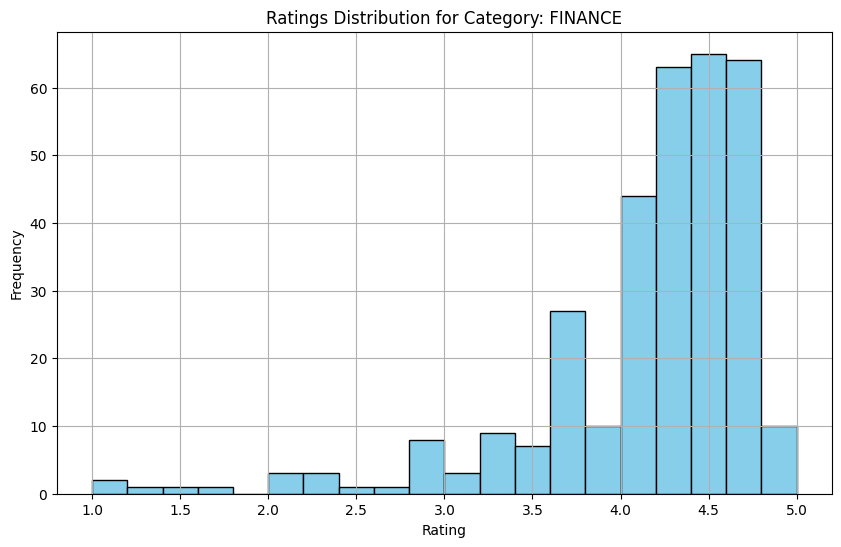

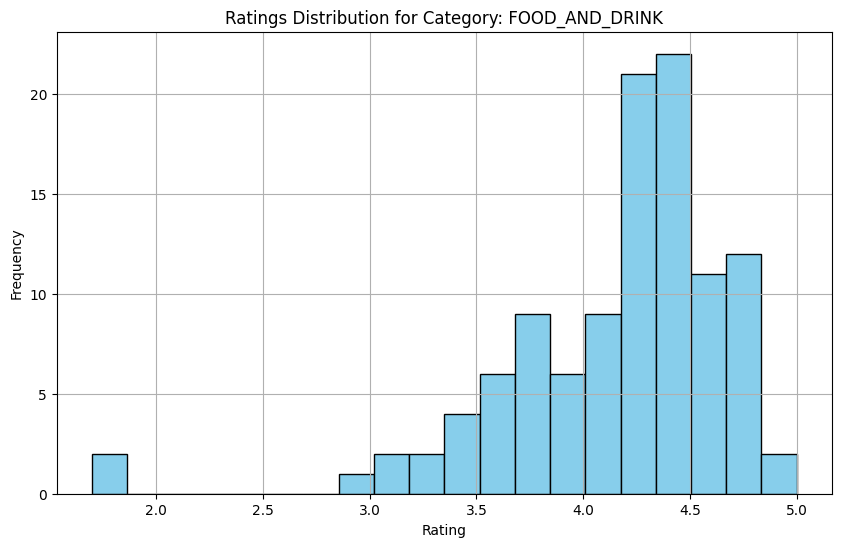

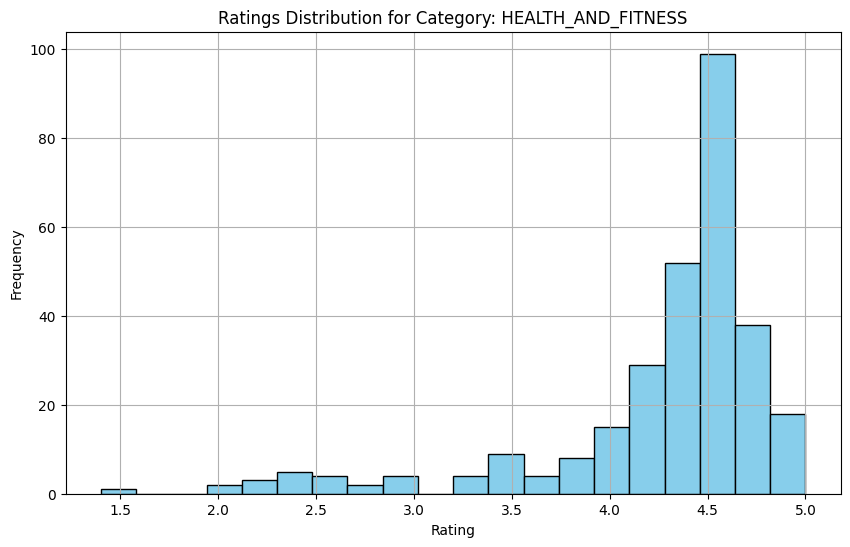

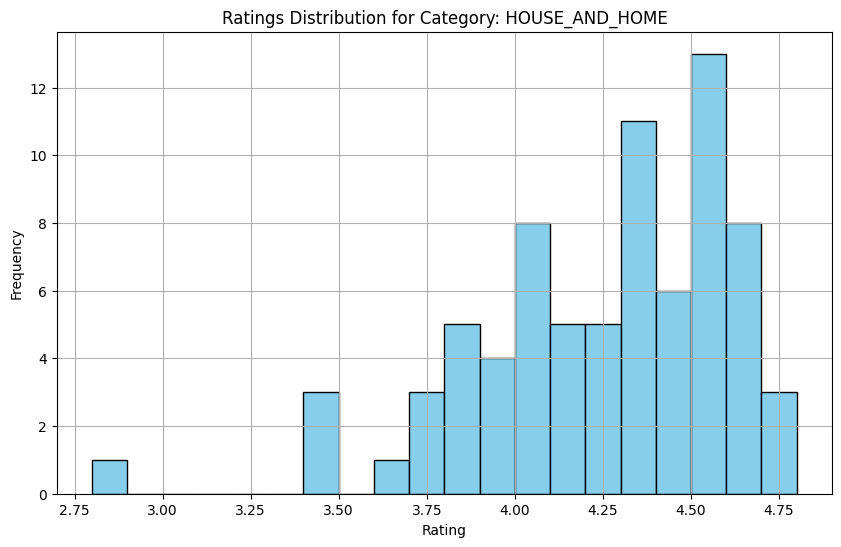

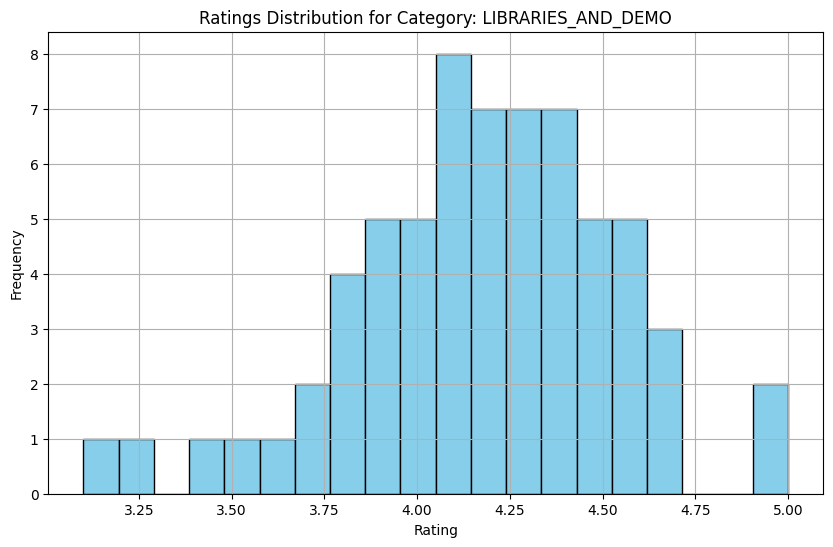

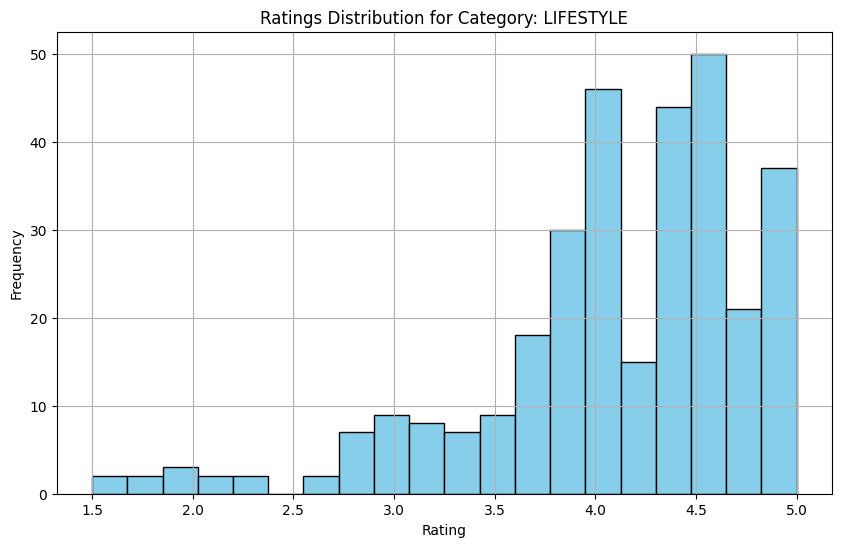

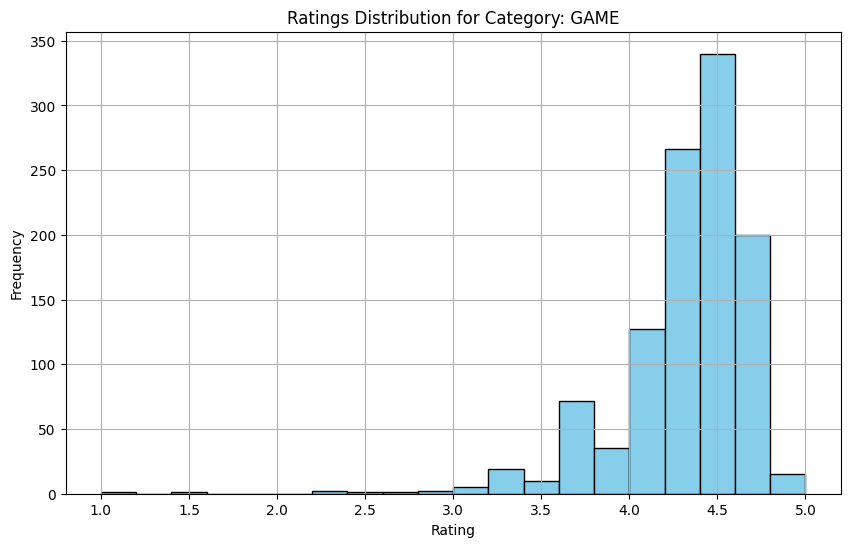

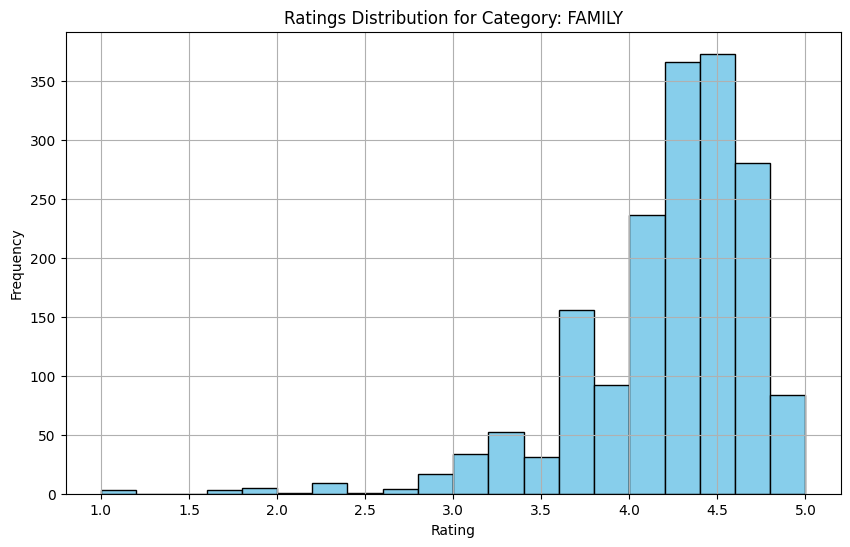

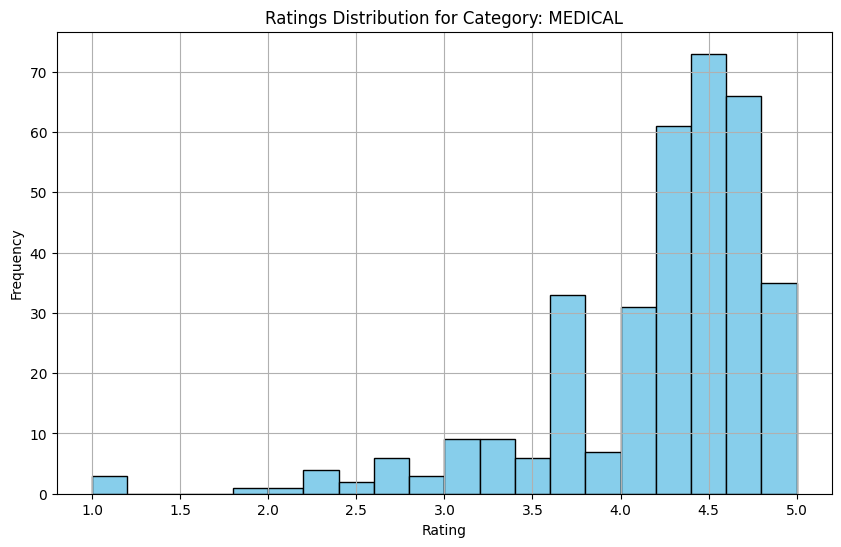

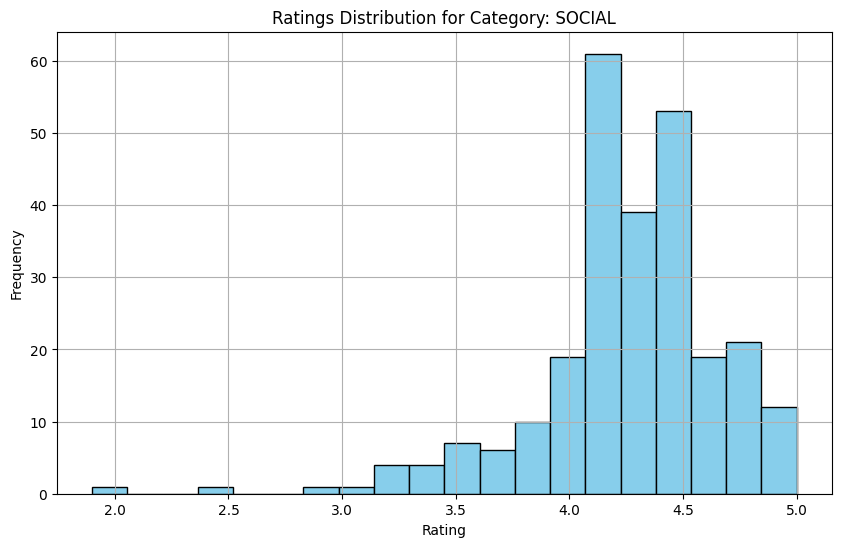

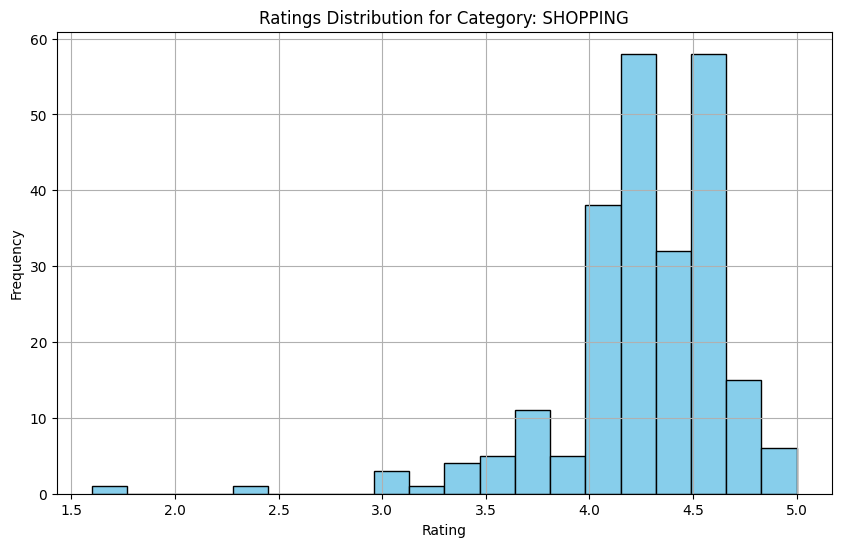

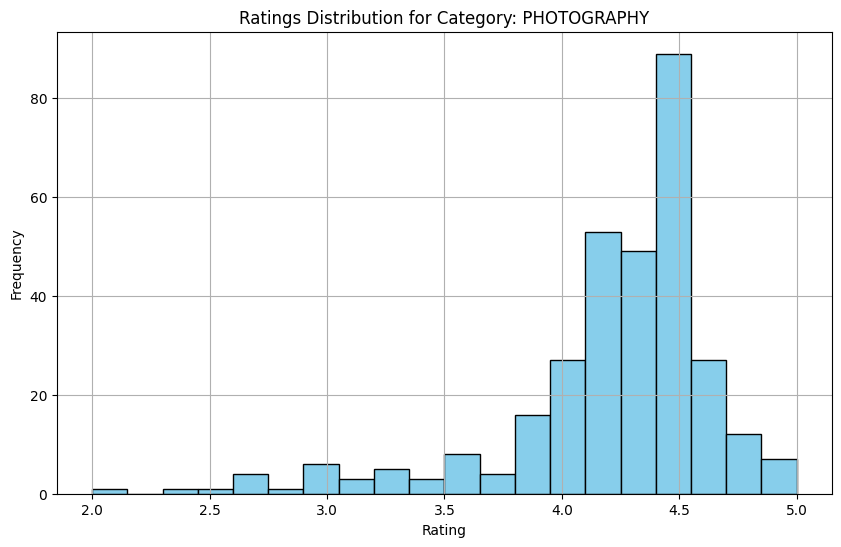

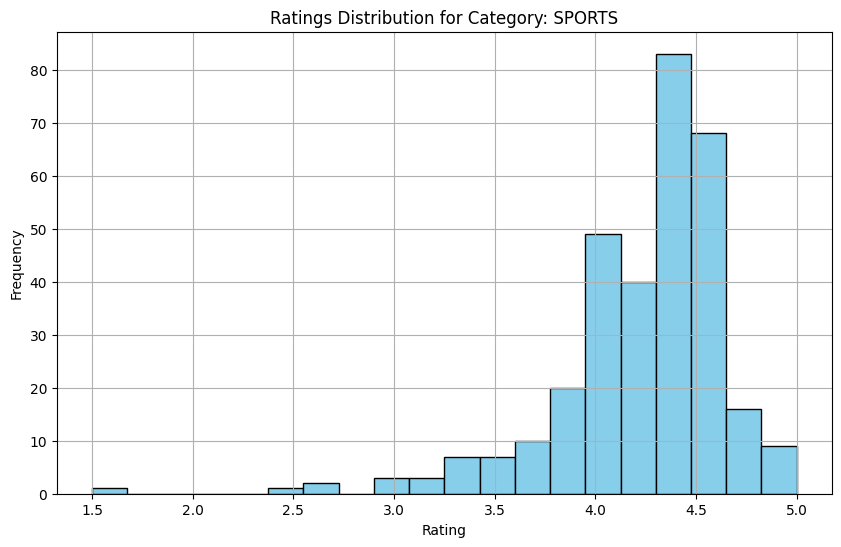

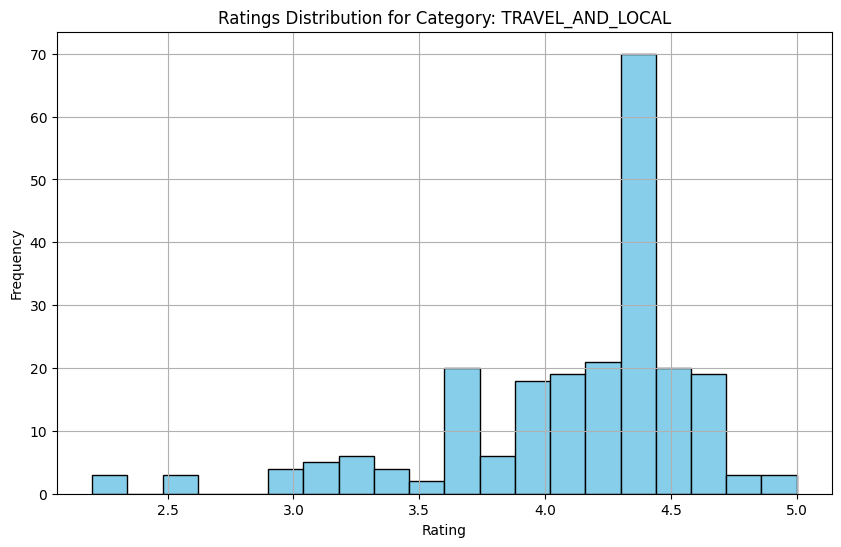

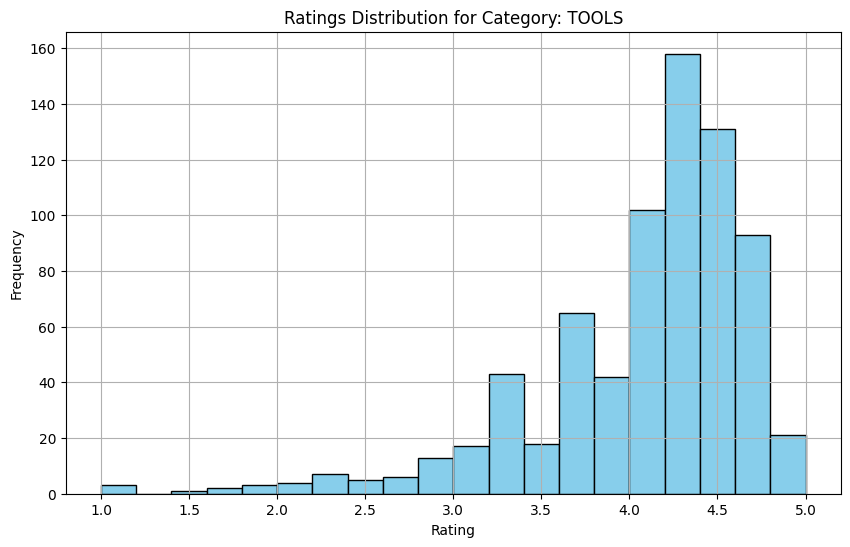

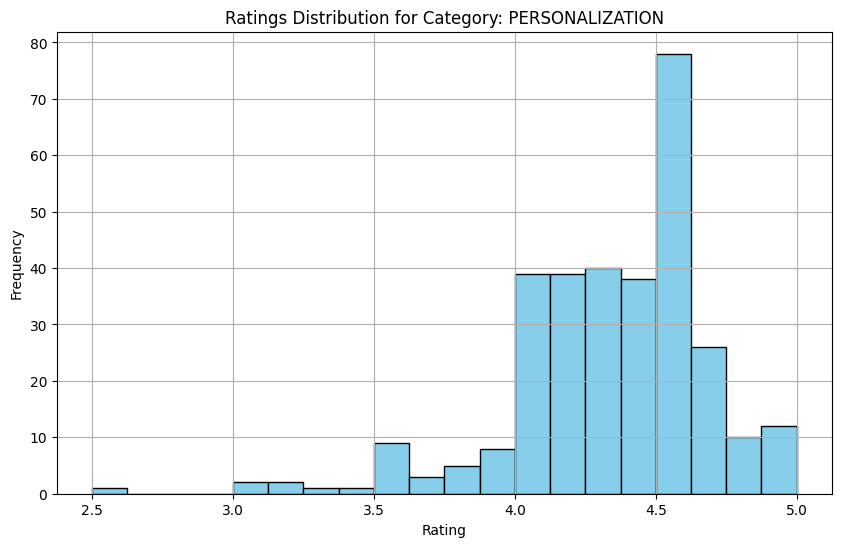

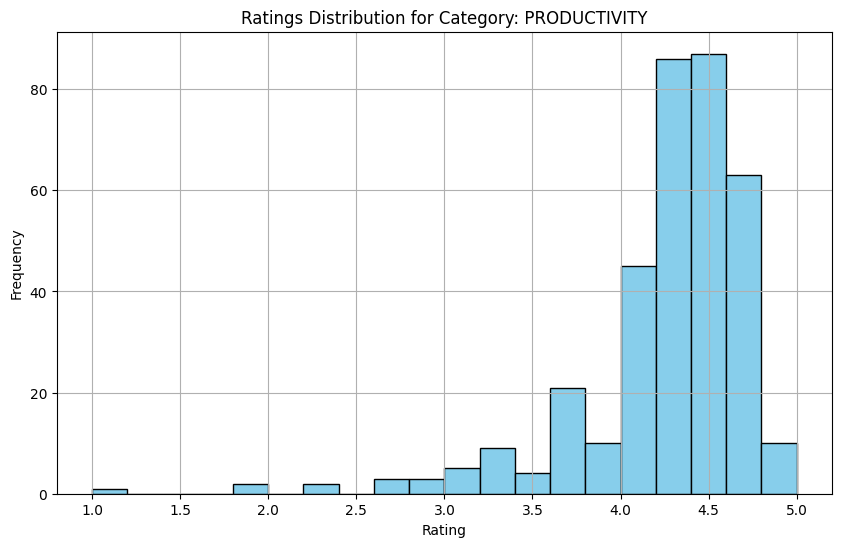

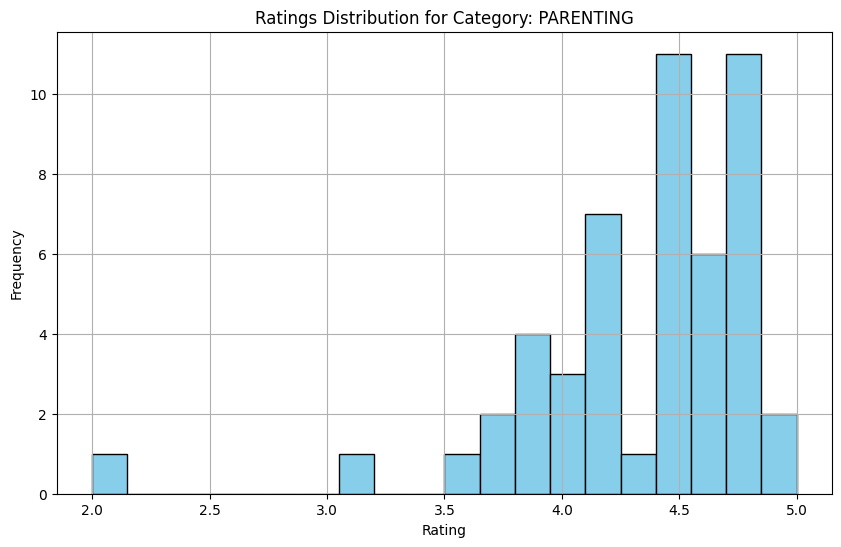

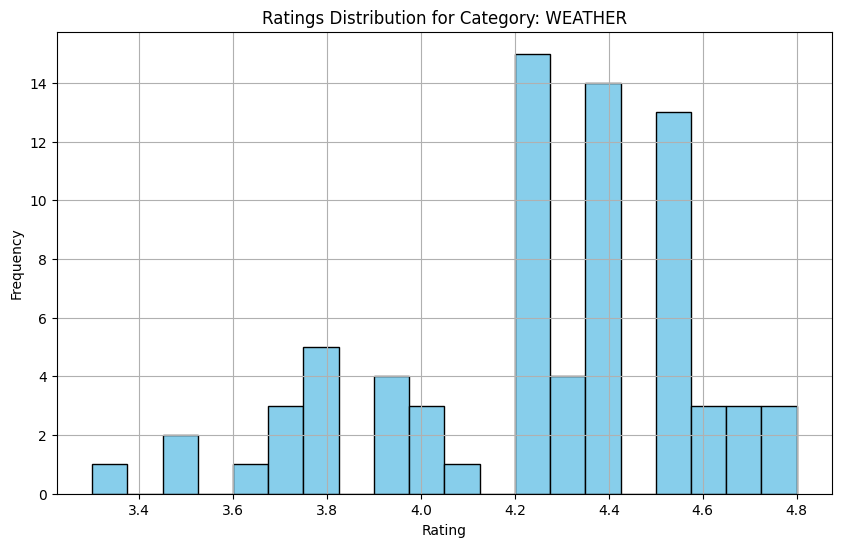

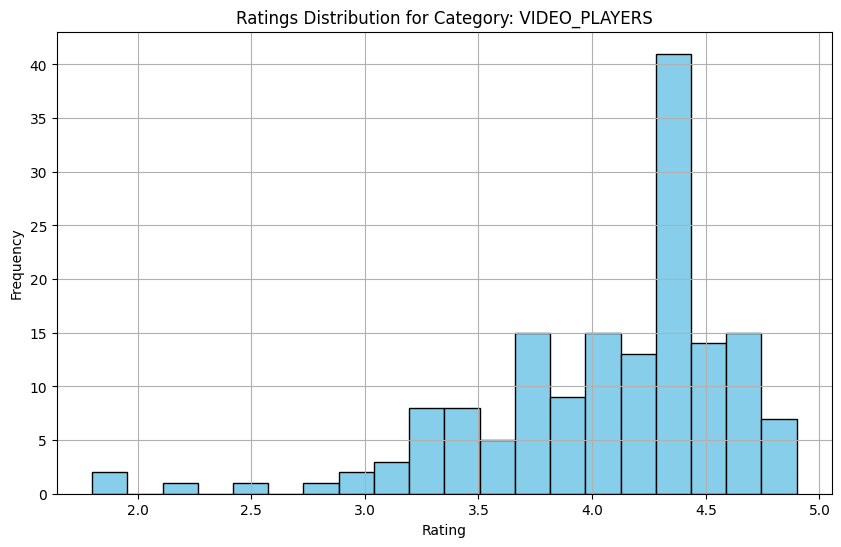

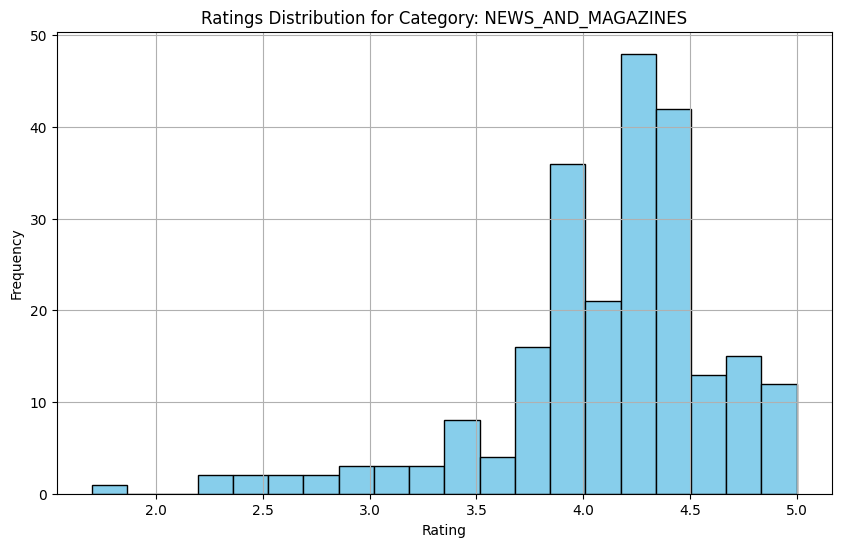

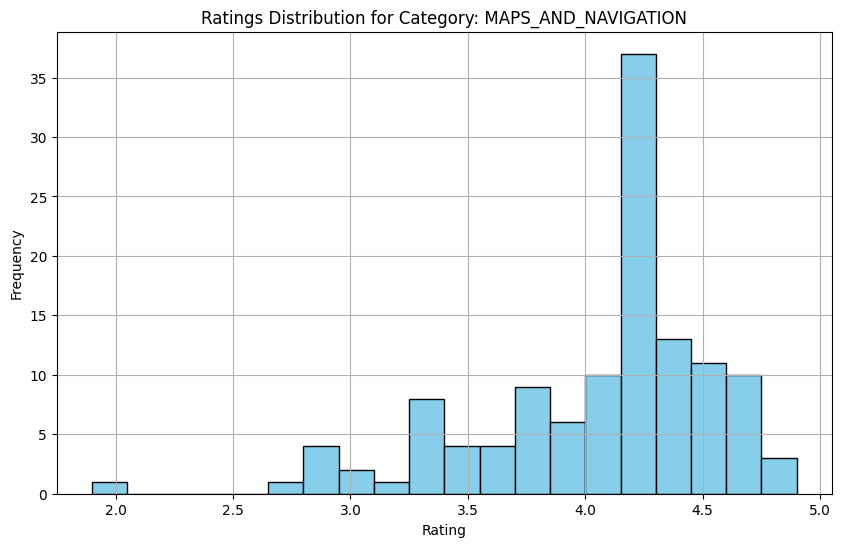

In [76]:
# Get unique categories
unique_categories = df['Category'].unique()

# Iterate over each category and plot ratings
for category in unique_categories:
    # Filter DataFrame for the current category
    category_df = df[df['Category'] == category]

    # Plot ratings for the current category
    plt.figure(figsize=(10, 6))
    plt.hist(category_df['Rating'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Ratings Distribution for Category: {category}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.show()

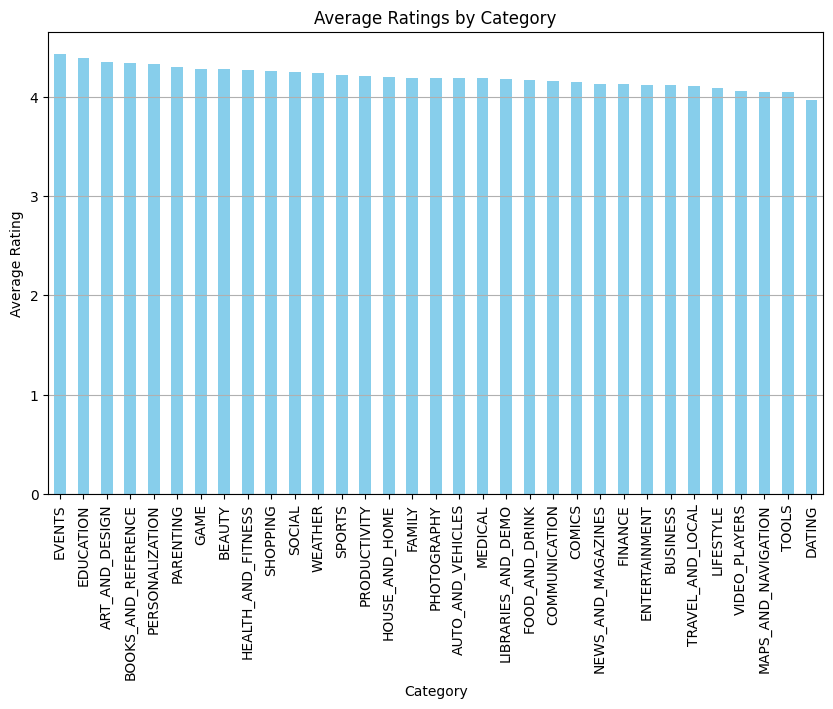

In [77]:
# plotting categories by rating


# Calculate average rating for each category
avg_ratings = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Plot average ratings for each category
plt.figure(figsize=(10, 6))
avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')
plt.show()

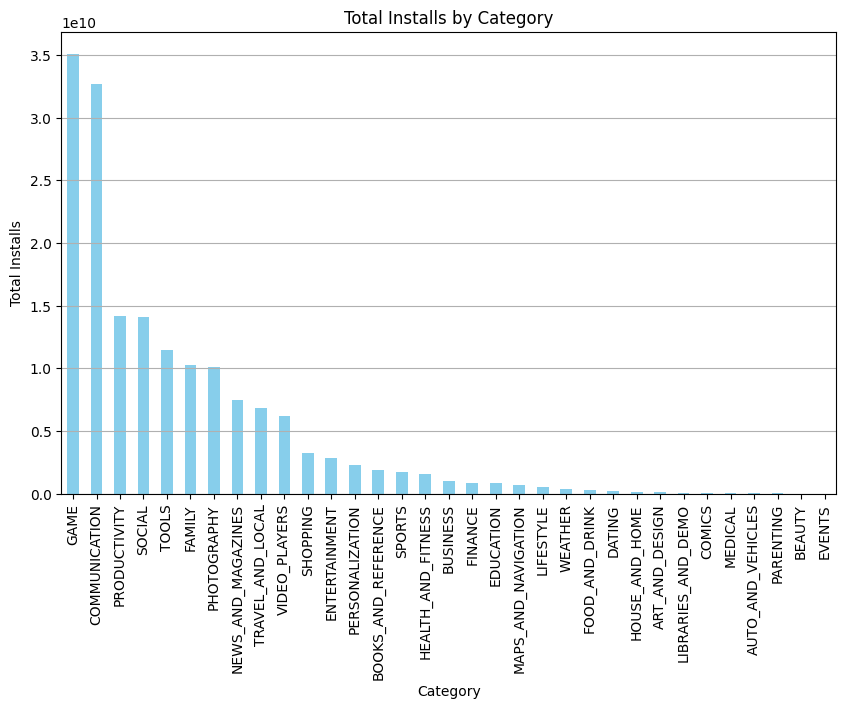

In [78]:
# plotting 'installations for each category'

# Calculate total installs for each category
total_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# Plot total installs for each category
plt.figure(figsize=(10, 6))
total_installs.plot(kind='bar', color='skyblue')
plt.title('Total Installs by Category')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')
plt.savefig("Total installs by category")
plt.show()

<Figure size 1200x600 with 0 Axes>

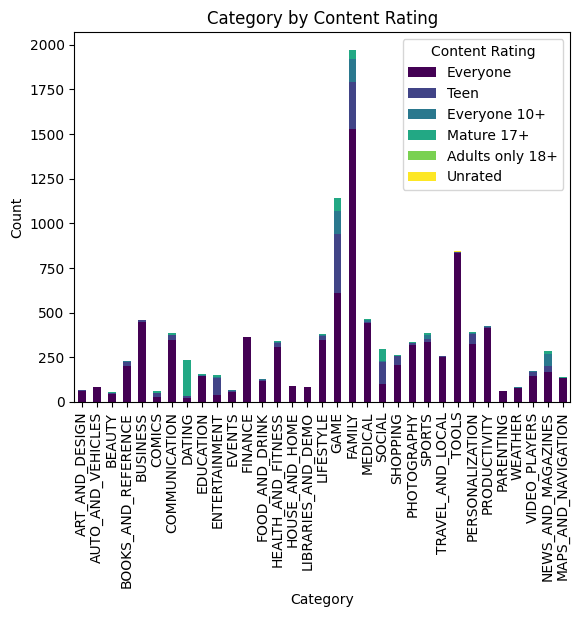

In [79]:
#category by content rating


# Filter out rows with NaN values in 'Content Rating' column
df_filtered = df.dropna(subset=['Content Rating'])

# Define unique content ratings
unique_content_ratings = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Adults only 18+', 'Unrated']

# Create a dictionary to store the count of each content rating for each category
category_content_rating_counts = {}
for category in df['Category'].unique():
    category_content_rating_counts[category] = {rating: 0 for rating in unique_content_ratings}

# Count occurrences of content ratings for each category
for category in df['Category'].unique():
    category_df = df[df['Category'] == category]
    for rating in unique_content_ratings:
        count = category_df[category_df['Content Rating'] == rating].shape[0]
        category_content_rating_counts[category][rating] = count

# Create a DataFrame from the counts dictionary
counts_df = pd.DataFrame(category_content_rating_counts).transpose()

# Plot the stacked bar plot
plt.figure(figsize=(12, 6))
counts_df.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Category by Content Rating')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Content Rating')
plt.savefig("Category by Content Rating")
plt.show()


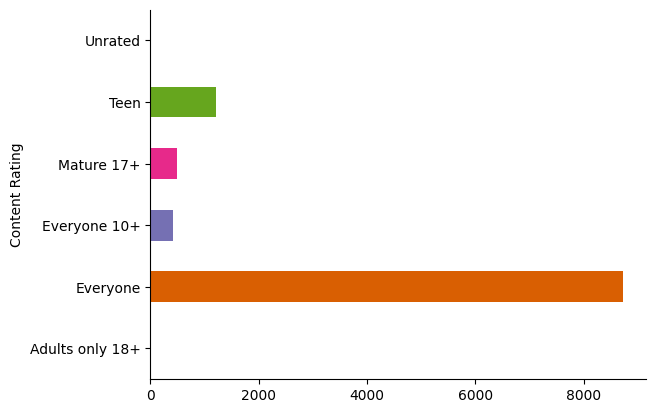

In [80]:
# number of apps by content rating


df.groupby('Content Rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.savefig("Number of applications by content rating")

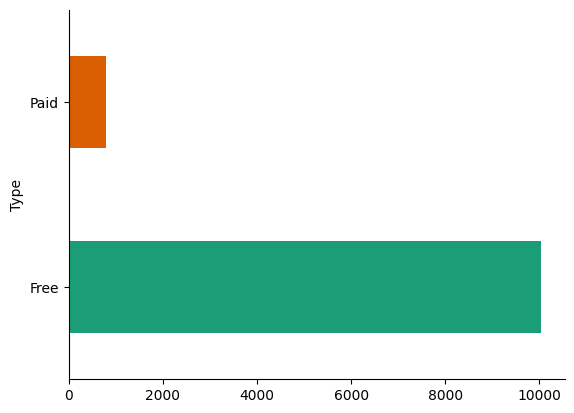

In [81]:
# number of apps by type(paid/free)

df.groupby('Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.savefig("Number of apps by type")

In [82]:
# Calculate the number of apps in each category
app_count_by_category = df['Category'].value_counts()

# Create a DataFrame
df_sunburst = pd.DataFrame({'Category': app_count_by_category.index, 'Count': app_count_by_category.values})

# Create a sunburst chart using Plotly
fig = px.sunburst(df_sunburst, path=['Category'], values='Count', color='Category')
fig.update_traces(textinfo='label+percent entry')
fig.update_layout(title='App Distribution by Category (Sunburst Chart)')
fig.show()

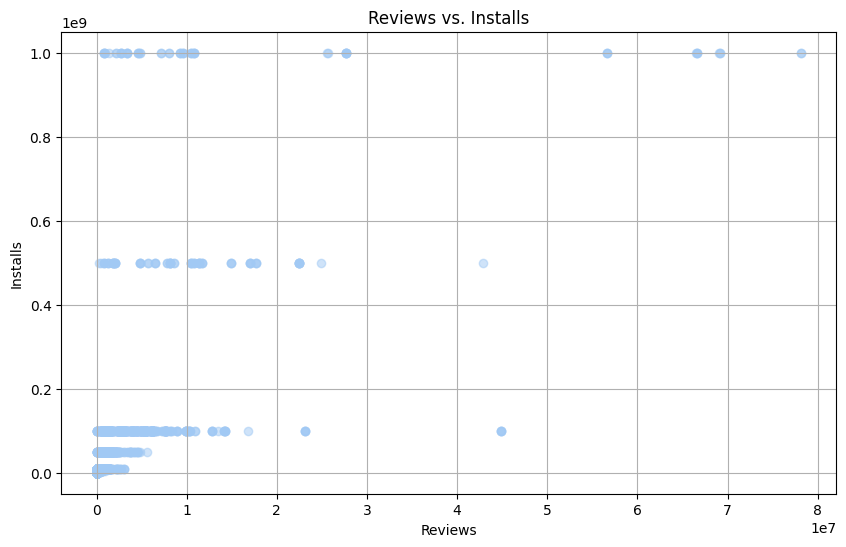

In [83]:
#scatter plot of reviews vs installs

plt.figure(figsize=(10, 6))
plt.scatter(df['Reviews'], df['Installs'], alpha=0.5)
plt.title('Reviews vs. Installs')
plt.xlabel('Reviews')
plt.ylabel('Installs')
plt.grid(True)
plt.savefig("Scatter plot of reviews vs installs")
plt.show()

<ipython-input-84-f66f9d2e0afe>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



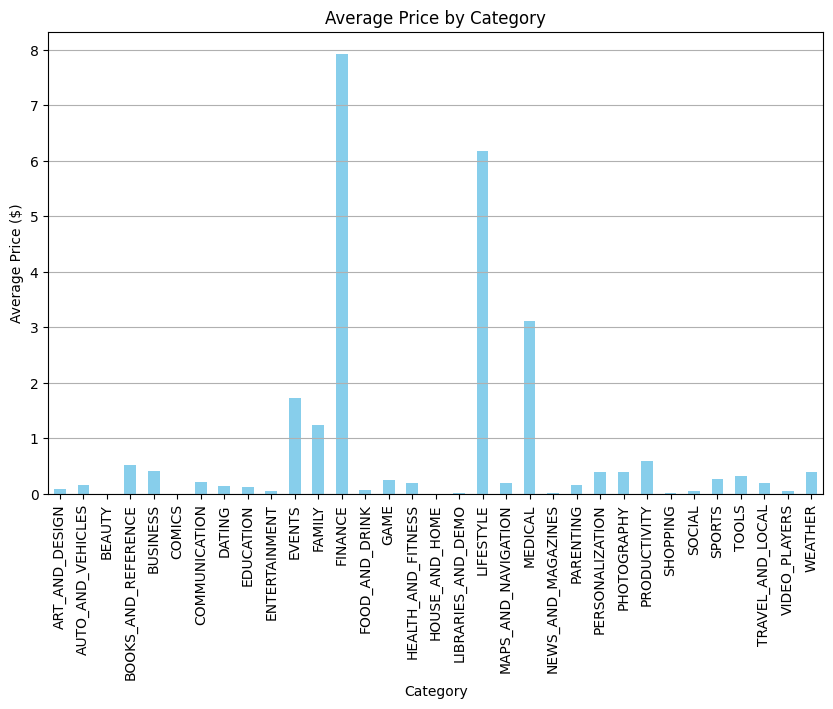

In [84]:
# Convert Price column to numeric (remove '$')
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Plot a bar plot
plt.figure(figsize=(10, 6))
df.groupby('Category')['Price'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.savefig("Average Price By category")
plt.show()

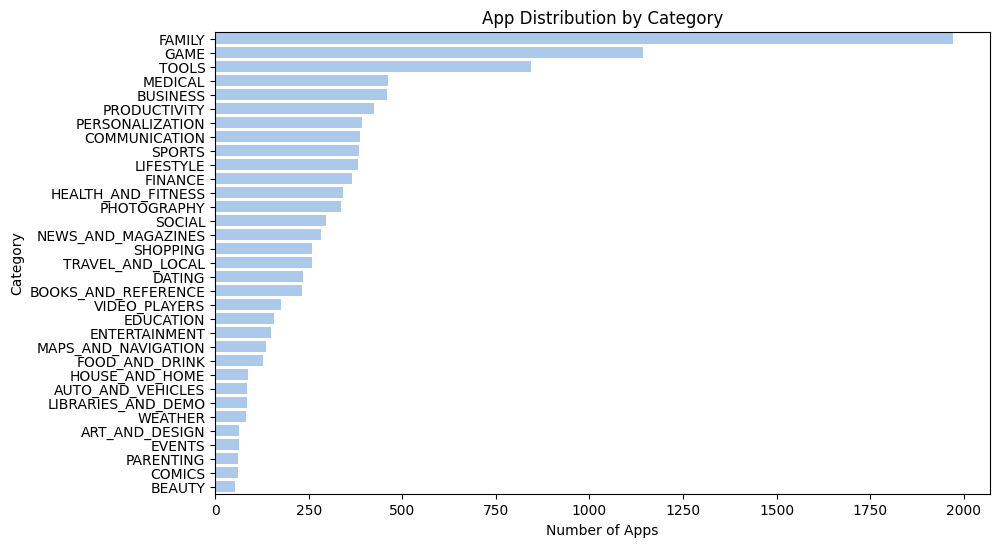

In [85]:
# Calculate the number of apps in each category
app_count_by_category = df['Category'].value_counts()

# Plot a pie chart using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
sns.barplot(x=app_count_by_category.values, y=app_count_by_category.index, orient='h')
plt.title('App Distribution by Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.savefig("App distribution by category")
plt.show()

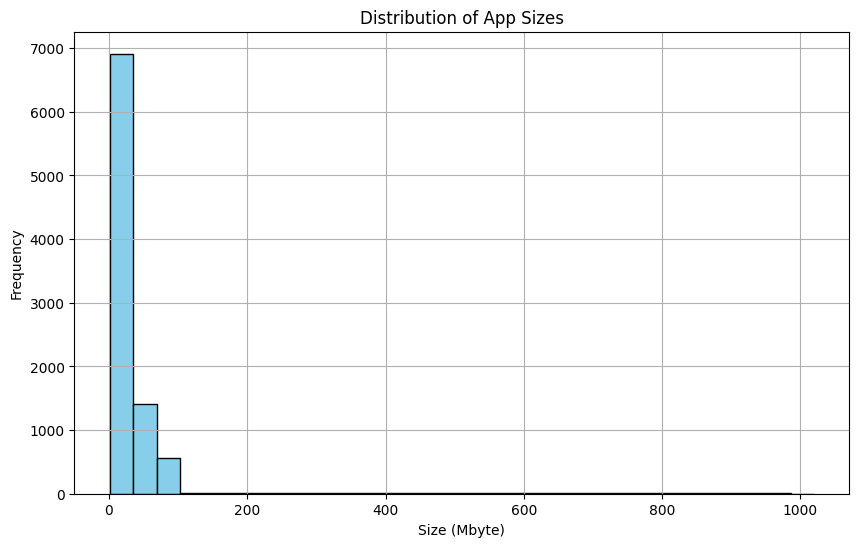

In [86]:
# Plot histogram of app sizes
plt.figure(figsize=(10, 6))
plt.hist(df['Size (Mbyte)'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of App Sizes')
plt.xlabel('Size (Mbyte)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("Distribution of App Sizes")
plt.show()

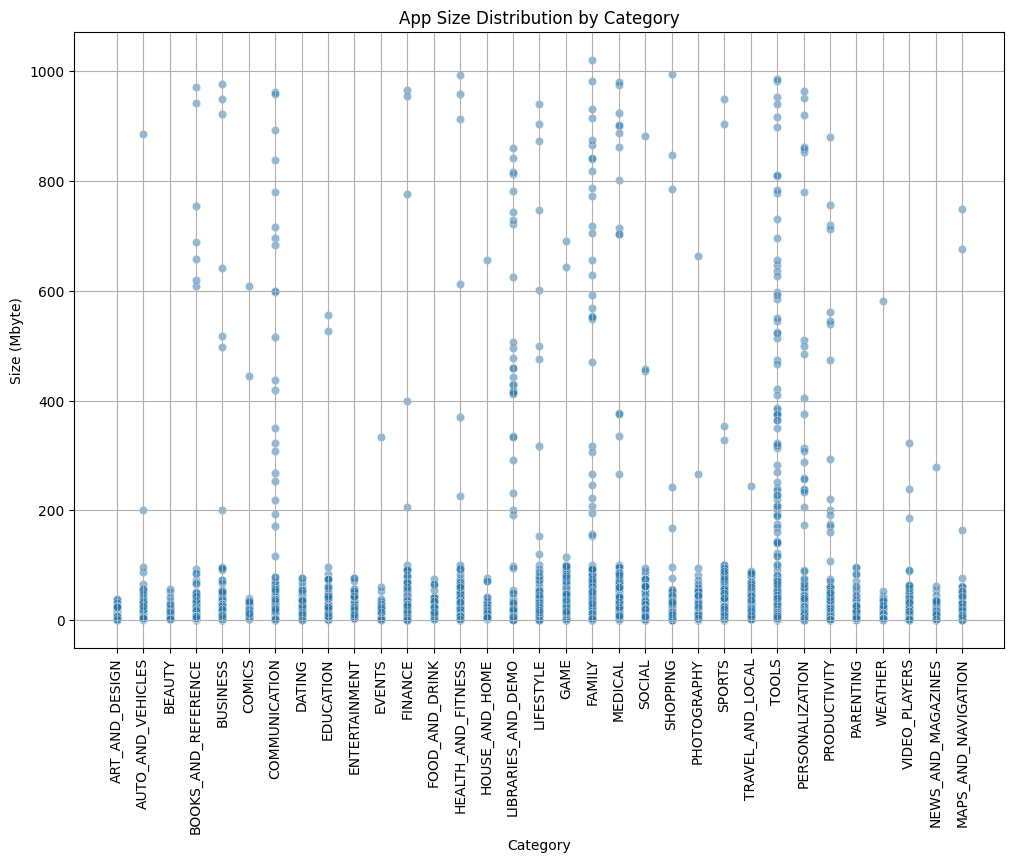

In [87]:
# Plot scatter plot of size vs. category

# Define the color for the scatter plot
scatter_color = '#1f77b4'


plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Category', y='Size (Mbyte)', alpha=0.5, color=scatter_color)
plt.title('App Size Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Size (Mbyte)')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig("App size distribution by category")
plt.show()

# Rating Prediction using Regression Machine Learning Model

Target : Y = rating

Values : X = reviews, size, type, content rating, installs

- reviews : numeric
- size : numeric
- type : dummy variable
- installs : numeric

## Data Pre-Processing

In [88]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

print(null_values)

Rating            1474
App                  0
Category             0
Reviews              0
Size (Mbyte)      1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [89]:
# Drop rows where 'Size' column has null values
df = df.dropna(subset=['Size (Mbyte)'])

#drop rows where 'rating' column has null values
df = df.dropna(subset=["Rating"])

In [90]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

print(null_values)

Rating            0
App               0
Category          0
Reviews           0
Size (Mbyte)      0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64


In [91]:
# Selecting input features (X) and target variable (y)
X = df[['Reviews', 'Size (Mbyte)', 'Type', 'Installs']]
y = df['Rating']

In [92]:
print(df.shape)
print(X.shape)
print( y.shape)

(7729, 13)
(7729, 4)
(7729,)


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

In [94]:
# Check the datatype of the 'Type' column
print(type(X['Type']))

<class 'pandas.core.series.Series'>


In [95]:
X.head()

,Reviews,Size (Mbyte),Type,Installs
0,159,19.0,Free,10000.0
1,967,14.0,Free,500000.0
2,87510,8.7,Free,5000000.0
3,215644,25.0,Free,50000000.0
4,967,2.8,Free,100000.0


In [96]:
# Convert the 'Type' column to string if it's not already

# this step is done as to convert type column into dummy variable
df['Type'] = df['Type'].astype(str)

In [97]:
# converting type column values into dummy variables


# Perform one-hot encoding using get_dummies()
type_encoded = pd.get_dummies(X['Type'], prefix='Type')

# Concatenate the one-hot encoded 'Type' columns with the original DataFrame
X = pd.concat([X.drop(['Type'], axis=1), type_encoded], axis=1)


# Now, df_encoded contains the one-hot encoded 'Type' columns
print(X.head())  # Check the first few rows to verify


   Reviews  Size (Mbyte)    Installs  Type_Free  Type_Paid
0      159          19.0     10000.0          1          0
1      967          14.0    500000.0          1          0
2    87510           8.7   5000000.0          1          0
3   215644          25.0  50000000.0          1          0
4      967           2.8    100000.0          1          0


Dropping the Type_Free column to eliminate redudancy

In [98]:
# Drop the column
X.drop(columns=['Type_Free'], inplace=True)

In [99]:
X.head()

,Reviews,Size (Mbyte),Installs,Type_Paid
0,159,19.0,10000.0,0
1,967,14.0,500000.0,0
2,87510,8.7,5000000.0,0
3,215644,25.0,50000000.0,0
4,967,2.8,100000.0,0


in 'type_paid' column 0 means app is free, 1 means app is paid

In [100]:
X.shape

(7729, 4)

In [101]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(7729, 4)
(6183, 4)
(1546, 4)


In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [104]:
X_train

array([[ 0.12417261,  0.11729139,  0.04929518, -0.28417444],
       [ 0.23455086, -0.17414291,  0.04929518, -0.28417444],
       [-0.15430081, -0.35655919, -0.1704718 , -0.28417444],
       ...,
       [-0.01001514, -0.26049381,  0.04929518, -0.28417444],
       [-0.15430293, -0.38354385, -0.1704718 , -0.28417444],
       [-0.15358381, -0.38354385, -0.16849192, -0.28417444]])

 ## 1. linear regression

In [105]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [106]:
from sklearn.metrics import mean_squared_error as mse

Using RMSE(root mean squared error) here to calculate performance of algorithms

In [107]:
# making a function for calculating root mean squared error

def rmse(y,y_pred):
    return (np.sqrt(mse(y,y_pred)))

In [108]:
# Getting prediciton on x_test
y_pred_lreg = regressor.predict(X_test)

In [109]:
# Scoring our model
print('Linear Regression')
# Root mean square error of our model
print('--'*25)
linreg_error = rmse(y_test, y_pred_lreg)
print('RMSE = ', linreg_error)

Linear Regression
--------------------------------------------------
RMSE =  0.5474395094809866


## 2. Support Vector Machines


In [110]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

In [111]:
# getting prediction on test set
y_pred_svr = svr.predict(X_test)


In [112]:
# Scoring our model
print('Support Vector Regression (RBF kernel)')
# Root mean square error of our model
print('--'*25)
svr_error = rmse(y_test, y_pred_svr)
print('RMSE = ', svr_error)

Support Vector Regression (RBF kernel)
--------------------------------------------------
RMSE =  0.545564956206932


## 3. Decision Tree Regression

In [113]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [114]:
# getting prediction on test set
y_pred_dtr = dtr.predict(X_test)

In [115]:
# Scoring our model
print('Decision Tree Regeression')
# Root mean square error of our model
print('--'*25)
dtr_error = rmse(y_test, y_pred_dtr)
print('RMSE = ', dtr_error)

Decision Tree Regeression
--------------------------------------------------
RMSE =  0.7552190124670595


## 4. Random Forest Regression

In [116]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [117]:
# getting prediction on test set
y_pred_rfr = rfr.predict(X_test)

In [118]:
# Scoring our model
print('Random Forest Regeression')
# Root mean square error of our model
print('--'*25)
rfr_error = rmse(y_test, y_pred_dtr)
print('RMSE = ', rfr_error)

Random Forest Regeression
--------------------------------------------------
RMSE =  0.7552190124670595
